# Assignment

This notebook shows how to implement k-means clustering algorithm using scikit-learn library with python

## Introduction
We will first use synthetic dataset to show how k-means work.

In [122]:
! pip install -r requirements.txt

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

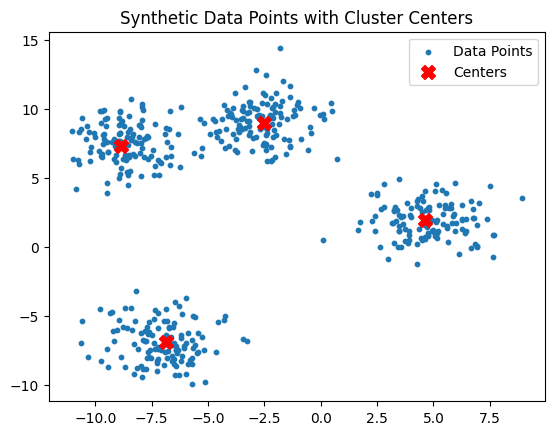

In [124]:
features, true_labels, centers = make_blobs(n_samples=500, centers=4, cluster_std=1.4, random_state=42, return_centers=True)
plt.scatter(features[:, 0], features[:, 1], s=10, label="Data Points")
plt.scatter(centers[:, 0], centers[:, 1], s = 100, c='red', marker='X', label='Centers')

plt.legend()
plt.title("Synthetic Data Points with Cluster Centers")
plt.show()

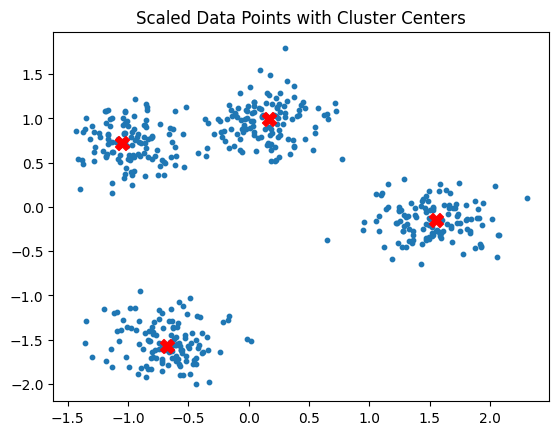

In [125]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_centers = scaler.fit_transform(centers)

plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=10, label="Data Points")
plt.scatter(scaled_centers[:, 0], scaled_centers[:, 1], s = 100, c='red', marker='X', label='Centers')

plt.title("Scaled Data Points with Cluster Centers")
plt.show()

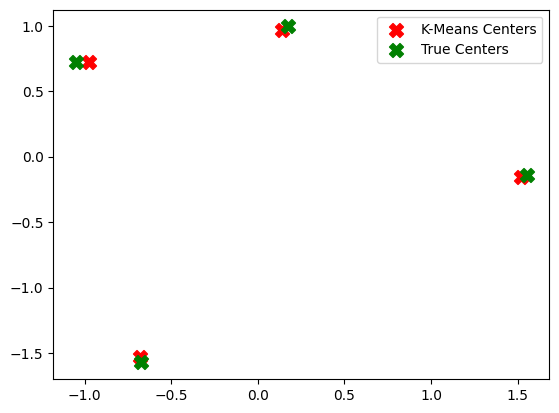

In [126]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=100,
    random_state=42
)

kmeans.fit(scaled_features)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label="K-Means Centers")
plt.scatter(scaled_centers[:, 0], scaled_centers[:, 1], s = 100, c='green', marker='X', label='True Centers')
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=10, label="Data Points")

plt.legend()
plt.show()

We can see that the K-Means clutering algorithm performed well to approximate the centers of clusters. 

## IRIS Dataset
Now we will try this in another dataset from scikit-learn. We will use the IRIS dataset.

In [127]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
data = iris.data
target = iris.target
target_names = iris.target_names
features = iris.feature_names

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [128]:
print("Details: ")
print("Data shape: ", data.shape)
print("Target shape: ", target.shape)
print("Target names: ", target_names)
print("Features: ", features)

Details: 
Data shape:  (150, 4)
Target shape:  (150,)
Target names:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Here we can see that the dataset has 4 features corresponding to 4 dimensions and has three targets (classes). The true target labels are loaded in the **target** dataframe. 

We will now follow the preprocessing steps to standaradize the dataset and then implement K-Means algorithm to cluster this dataset. 

In [129]:
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(
    init="random",
    n_clusters=3,
    max_iter=100,
    n_init=50,
    random_state=42
)

kmeans.fit(scaled_data)

print("Calculated Cluster Centers: ")
print(kmeans.cluster_centers_)

Calculated Cluster Centers: 
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]


We can see that our model is successful to calculate the cluster centers for the iris dataset. 

The centers have four co-ordinates so it is not possible to visualize the centers in a scatterplot. We can use **PCA** to reduce it's dimension to 2 and then plot them to visualize our model's performance.

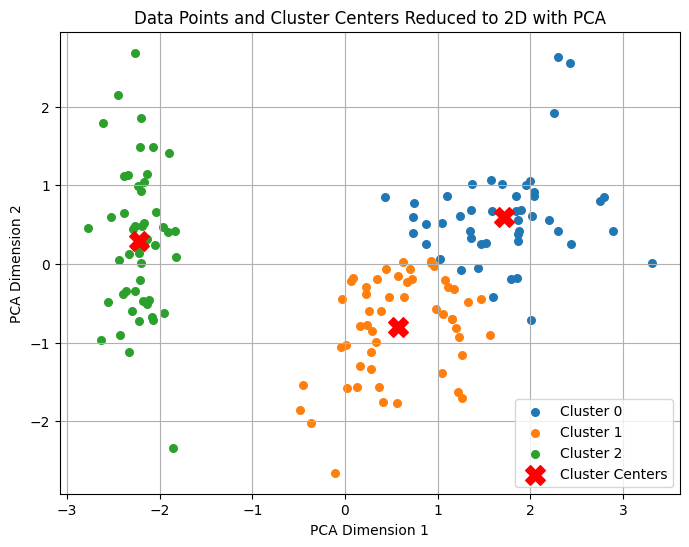

In [130]:
from sklearn.decomposition import PCA

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Apply PCA to reduce dimensions of the entire dataset and cluster centers
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)  # Reduce dimensions of data points
reduced_centers = pca.transform(cluster_centers)  # Reduce dimensions of cluster centers

# Plot data points and cluster centers
plt.figure(figsize=(8, 6))
# Plot data points with color coding by cluster
for cluster_label in np.unique(labels):
    cluster_points = reduced_data[labels == cluster_label]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f"Cluster {cluster_label}",
        s=30
    )

# Plot cluster centers
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Customize the plot
plt.title('Data Points and Cluster Centers Reduced to 2D with PCA')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


Here we can observe the reduced dimensions of datapoints and the respective cluster centers calculated with k-means. Visually we can confirm that the performance for the k-means algorithm is quite satisfactory and it is successful in classifying the 3 classes accordingly.

## Conclusion

For some datasets, we might need to reduce the dataset's domensions in order to perform k-means algorithm. For this dataset, we knew the number of clusters but for unsupervised learning, this information might not be available. We then will require some evaluation metrics to tune some of the hyperparameters like:
* **n_clusters**: Number of clusters for the k-means algorithm
* **n_components**: Number of principal components we need to analyze to produce the clusters

Some common evaluation metrics are:
* **silhoutte_score**: Measures how similar a data point is to its cluster compared to other clusters.
* **adjusted_rand_score(ARI)**: Measures the similarity between predicted and true cluster labels. This one only works when we know the true cluster labels like IRIS dataset.

We will now justify these metrics for the IRIS dataset.

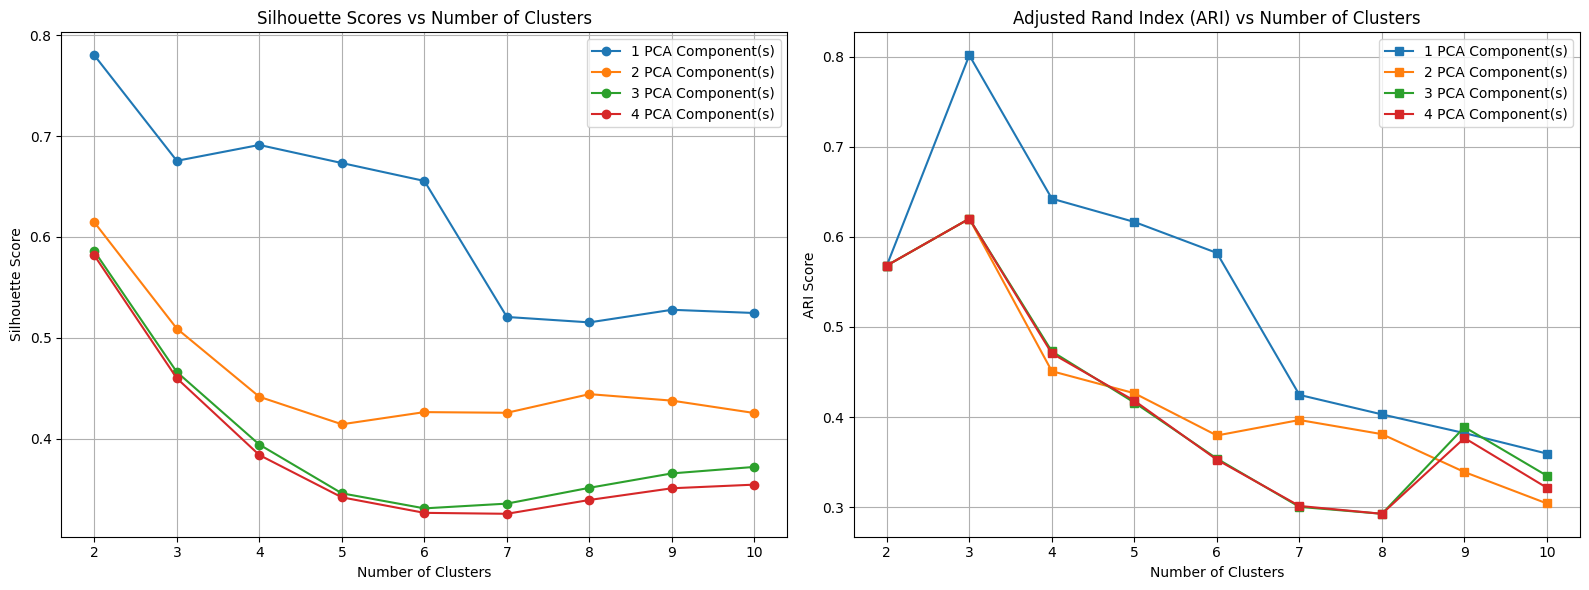

In [131]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Initialize variables
cluster_range = range(2, 11)
pca_component_range = range(1, 5)

silhouette_scores = np.zeros((len(cluster_range), len(pca_component_range)))
ari_scores = np.zeros((len(cluster_range), len(pca_component_range)))

# Perform clustering and calculate metrics
for i, n_cluster in enumerate(cluster_range):
    for j, n_component in enumerate(pca_component_range):
        pca = PCA(n_components=n_component)
        reduced_data = pca.fit_transform(scaled_data)
        
        kmeans = KMeans(
            init="random",
            n_clusters=n_cluster,
            max_iter=100,
            n_init=50,
            random_state=42
        )
        kmeans.fit(reduced_data)
        labels = kmeans.labels_
        
        # Compute scores
        silhouette_scores[i, j] = silhouette_score(reduced_data, labels)
        ari_scores[i, j] = adjusted_rand_score(target, labels)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Silhouette Scores
for j, n_component in enumerate(pca_component_range):
    axes[0].plot(
        cluster_range, 
        silhouette_scores[:, j], 
        marker='o', 
        label=f'{n_component} PCA Component(s)'
    )
axes[0].set_title('Silhouette Scores vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')
axes[0].legend()
axes[0].grid(True)

# Plot ARI Scores
for j, n_component in enumerate(pca_component_range):
    axes[1].plot(
        cluster_range, 
        ari_scores[:, j], 
        marker='s', 
        label=f'{n_component} PCA Component(s)'
    )
axes[1].set_title('Adjusted Rand Index (ARI) vs Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('ARI Score')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

As we can observe, the Silhoutte Score is lowest when:
* **n_component** = 4

and ARI Score is highest when:
* **n_cluster** = 3

This tells us that we will get the best clustering results when we use the 4 principal components (corresponding to all the available dimensions without reducing) and 3 clusters to perform K-Means Algorithm.